In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

c:\Users\sachi\OneDrive\Desktop\Codes\learning_pytorch\l-pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
train_data = datasets.FashionMNIST(root="C:/Users/sachi/OneDrive/Desktop/Codes/learning_pytorch", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="C:/Users/sachi/OneDrive/Desktop/Codes/learning_pytorch", train=False, download=True, transform=ToTensor())

In [95]:
classes = train_data.classes
len(classes)

10

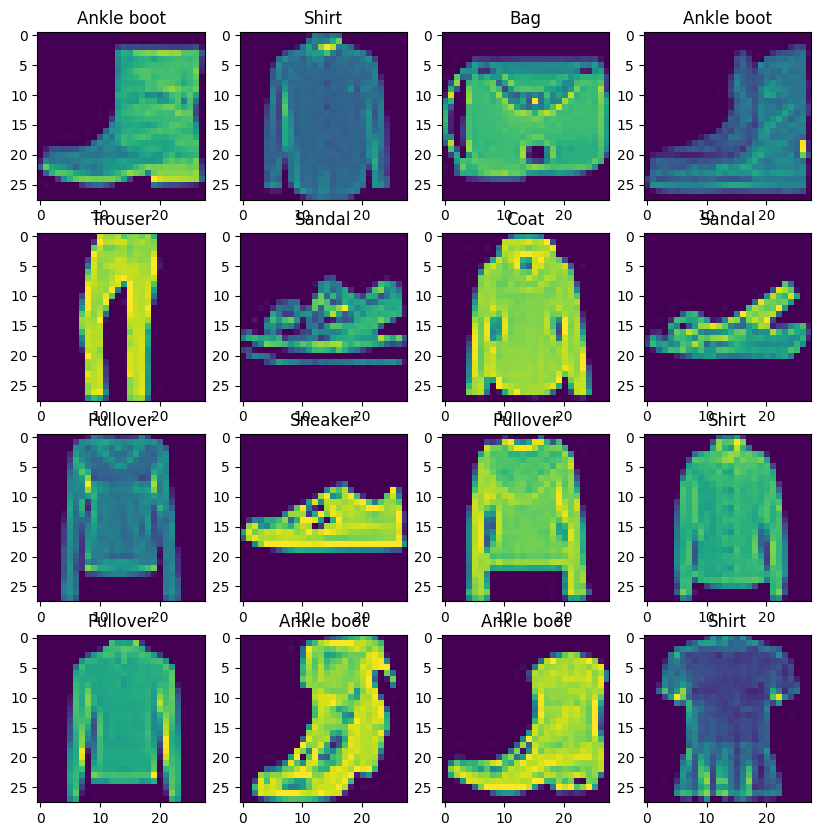

In [96]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_data.data), (16,))

plt.figure(figsize=(10,10))

for idx, i in zip(random_idx, range(16)):
    image, label = train_data[idx]
    plt.subplot(4, 4, i+1)
    plt.imshow(image.squeeze())
    plt.title(classes[label])

In [4]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

In [5]:
train_loader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: C:/Users/sachi/OneDrive/Desktop/Codes/learning_pytorch
    Split: Train
    StandardTransform
Transform: ToTensor()

In [98]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 10)
        # self.layer4 = nn.Linear(256, 128)
        # self.layer5 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x0 = self.flat(x)
        x1 = self.layer1(x0)
        x2 = self.relu(x1)
        x3 = self.layer2(x2)
        x4 = self.relu(x3)
        x5 = self.layer3(x4)
        # x6 = self.relu(x5)
        # x7 = self.layer4(x6)
        # x8 = self.relu(x7)
        # x9 = self.layer5(x8)

        return x5

model = FashionMNIST().to(device)


In [99]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [100]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [101]:
num_epochs = 100

train_accuraccy_values = []
test_accuracy_values = []
train_loss_values = []
test_loss_values = []

# accuracy after each epoch
# loss after each epoch
# flag = 0
for epochs in tqdm(range(num_epochs)):
  train_loss_cum = 0
  test_loss_cum = 0
  train_accuracy_cum = 0
  test_accuracy_cum = 0
  for batch, (X, y) in enumerate(train_loader):
    model.train()
    X = X.to(device)
    y = y.to(device)
    train_logits = model(X)
    train_y_pred = torch.softmax(train_logits, dim=1).argmax(dim=1)
        # soft_output = torch.softmax(train_logits, dim=1)
    train_loss = loss_fn(train_logits, y)
        # if(flag == 0):
        #   print(f"Train logits {train_logits}, softmax output {soft_output}, y pred {train_y_pred}, y {y}, Train loss {train_loss}")
        #   flag = 1
    train_loss_cum += train_loss
    train_accuracy = accuracy_fn(y, train_y_pred)
    train_accuracy_cum += train_accuracy
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

  model.eval()
  avg_train_accuracy = train_accuracy_cum/len(train_loader)
  avg_train_loss = train_loss_cum/len(train_loader)

  with torch.inference_mode():
    for X, y in test_loader:
      X = X.to(device)
      y = y.to(device)
      test_logits = model(X)
      test_y_pred = torch.softmax(test_logits, dim =1).argmax(dim=1)
      test_loss = loss_fn(test_logits, y)
      test_loss_cum += test_loss
      test_accuracy = accuracy_fn(y, test_y_pred)
      test_accuracy_cum += test_accuracy

  avg_test_accuracy = test_accuracy_cum/len(test_loader)
  avg_test_loss = test_loss_cum/len(test_loader)
  train_accuraccy_values.append(avg_train_accuracy)
  test_accuracy_values.append(avg_test_accuracy)
  train_loss_values.append(avg_train_loss)
  test_loss_values.append(avg_test_loss)

  # if((epochs) % 10 == 0):
  print(f"Epoch {epochs+1}: Train Accuracy {avg_train_accuracy} | Test Accuracy {avg_test_accuracy}")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: Train Accuracy 81.87633262260128 | Test Accuracy 85.79816878980891
Epoch 2: Train Accuracy 86.98194296375266 | Test Accuracy 86.69386942675159
Epoch 3: Train Accuracy 88.19462953091684 | Test Accuracy 87.57961783439491
Epoch 4: Train Accuracy 88.97254797441364 | Test Accuracy 87.11186305732484
Epoch 5: Train Accuracy 89.52558635394456 | Test Accuracy 88.1468949044586
Epoch 6: Train Accuracy 90.10527718550107 | Test Accuracy 87.67914012738854
Epoch 7: Train Accuracy 90.51172707889125 | Test Accuracy 88.3359872611465
Epoch 8: Train Accuracy 90.95315831556503 | Test Accuracy 87.74880573248407
Epoch 9: Train Accuracy 91.4129131130064 | Test Accuracy 89.171974522293
Epoch 10: Train Accuracy 91.66944296375266 | Test Accuracy 88.44546178343948
Epoch 11: Train Accuracy 92.05257196162047 | Test Accuracy 89.01273885350318
Epoch 12: Train Accuracy 92.20748933901919 | Test Accuracy 88.20660828025478
Epoch 13: Train Accuracy 92.7621934968017 | Test Accuracy 89.65963375796179
Epoch 14: Trai

In [112]:
test_loss_tensor = torch.Tensor(test_loss_values)
train_loss_tensor = torch.Tensor(train_loss_values)

<Figure size 1000x1000 with 0 Axes>

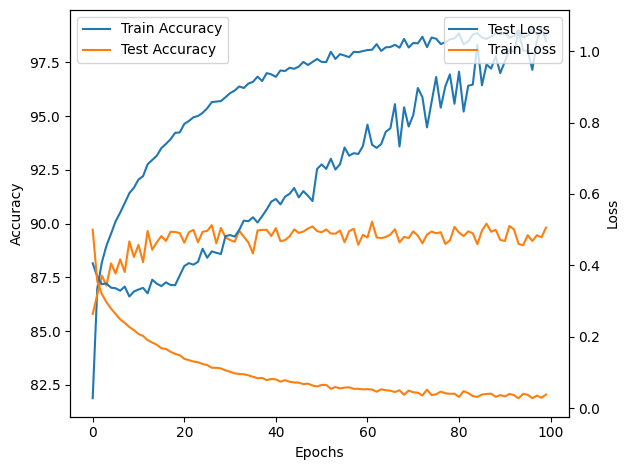

In [123]:
plt.figure(figsize=(10,10))
fig, ax1 = plt.subplots()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.plot(train_accuraccy_values, label="Train Accuracy")
ax1.plot(test_accuracy_values, label="Test Accuracy")

ax1.legend(loc='upper left')
ax2 = ax1.twinx()

ax2.set_ylabel("Loss")
ax2.plot(test_loss_tensor, label="Test Loss")
ax2.plot(train_loss_tensor, label="Train Loss")

ax2.legend(loc='upper right')
fig.tight_layout()
plt.show()